### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### Preprocessing

In [4]:
titanic = pd.read_csv('C:/Users/yongchae/Desktop/SKN/titanic_kor.csv')

In [40]:
display(titanic.head().T)
print(titanic.info())

,0,1,2,3,4
생존,0,1,1,1,0
등급,3,1,3,1,3
성별,male,female,female,female,male
나이,22.0,38.0,26.0,35.0,35.0
형제자매,1,1,0,1,0
부모자녀,0,0,0,0,0
요금,7.25,71.2833,7.925,53.1,8.05
탑승지코드,S,C,S,S,S
객실등급,Third,First,Third,First,Third
성인여부,man,woman,woman,woman,man


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생존      891 non-null    int64  
 1   등급      891 non-null    int64  
 2   성별      891 non-null    object 
 3   나이      714 non-null    float64
 4   형제자매    891 non-null    int64  
 5   부모자녀    891 non-null    int64  
 6   요금      891 non-null    float64
 7   탑승지코드   889 non-null    object 
 8   객실등급    891 non-null    object 
 9   성인여부    891 non-null    object 
 10  성인남성    891 non-null    bool   
 11  선실코드    203 non-null    object 
 12  탑승지명    889 non-null    object 
 13  생존여부    891 non-null    object 
 14  개인탑승자   891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [41]:
titanic['성인여부'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [194]:
titanic.isnull().mean()

생존       0.000000
등급       0.000000
성별       0.000000
나이       0.198653
형제자매     0.000000
부모자녀     0.000000
요금       0.000000
탑승지코드    0.002245
객실등급     0.000000
성인여부     0.000000
성인남성     0.000000
선실코드     0.772166
탑승지명     0.002245
생존여부     0.000000
개인탑승자    0.000000
dtype: float64

In [5]:
# 결측치 비율 70% 이상이면 컬럼 삭제
missing_ratio = titanic.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.7].index.tolist()

titanic_drop = titanic.drop(columns=columns_to_drop, axis=1)

In [6]:
titanic_drop.isnull().any()

생존       False
등급       False
성별       False
나이        True
형제자매     False
부모자녀     False
요금       False
탑승지코드     True
객실등급     False
성인여부     False
성인남성     False
탑승지명      True
생존여부     False
개인탑승자    False
dtype: bool

In [7]:
# 쓸 컬럼만 남겨
titanic_drop = titanic_drop.drop(columns = ['등급', '성별', '성인남성', '탑승지명', '생존여부'])

In [8]:
titanic_drop.isnull().any()

생존       False
나이        True
형제자매     False
부모자녀     False
요금       False
탑승지코드     True
객실등급     False
성인여부     False
개인탑승자    False
dtype: bool

In [9]:
mode_val = titanic_drop['탑승지코드'].mode()[0]
titanic_drop['탑승지코드'] = titanic_drop['탑승지코드'].fillna(mode_val)

In [10]:
children_age_mean = titanic_drop.loc[titanic_drop['성인여부'] == 'child', '나이'].mean()
adult_age_mean = titanic_drop.loc[titanic_drop['성인여부'].isin(['man', 'woman']), '나이'].mean()

def fill_age(row):
    if pd.isna(row['나이']):
        if row['성인여부'] == 'child':
            return children_age_mean
        elif row['성인여부'] in ['man', 'woman']:
            return adult_age_mean
    return row['나이']

titanic_drop['나이'] = titanic_drop.apply(fill_age, axis=1)

In [11]:
titanic_drop.head(10).T

,0,1,2,3,4,5,6,7,8,9
생존,0,1,1,1,0,0,0,0,1,1
나이,22.0,38.0,26.0,35.0,35.0,32.767829,54.0,2.0,27.0,14.0
형제자매,1,1,0,1,0,0,0,3,0,1
부모자녀,0,0,0,0,0,0,0,1,2,0
요금,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708
탑승지코드,S,C,S,S,S,Q,S,S,S,C
객실등급,Third,First,Third,First,Third,Third,First,Third,Third,Second
성인여부,man,woman,woman,woman,man,man,man,child,woman,child
개인탑승자,False,False,True,False,True,True,True,False,False,False


In [12]:
titanic_drop.isnull().sum()

생존       0
나이       0
형제자매     0
부모자녀     0
요금       0
탑승지코드    0
객실등급     0
성인여부     0
개인탑승자    0
dtype: int64

### EDA

In [52]:
titanic_drop.head()

,생존,나이,형제자매,부모자녀,요금,탑승지코드,객실등급,성인여부,개인탑승자
0,0,22.0,1,0,7.2500,S,Third,man,False
1,1,38.0,1,0,71.2833,C,First,woman,False
2,1,26.0,0,0,7.9250,S,Third,woman,True
3,1,35.0,1,0,53.1000,S,First,woman,False
4,0,35.0,0,0,8.0500,S,Third,man,True


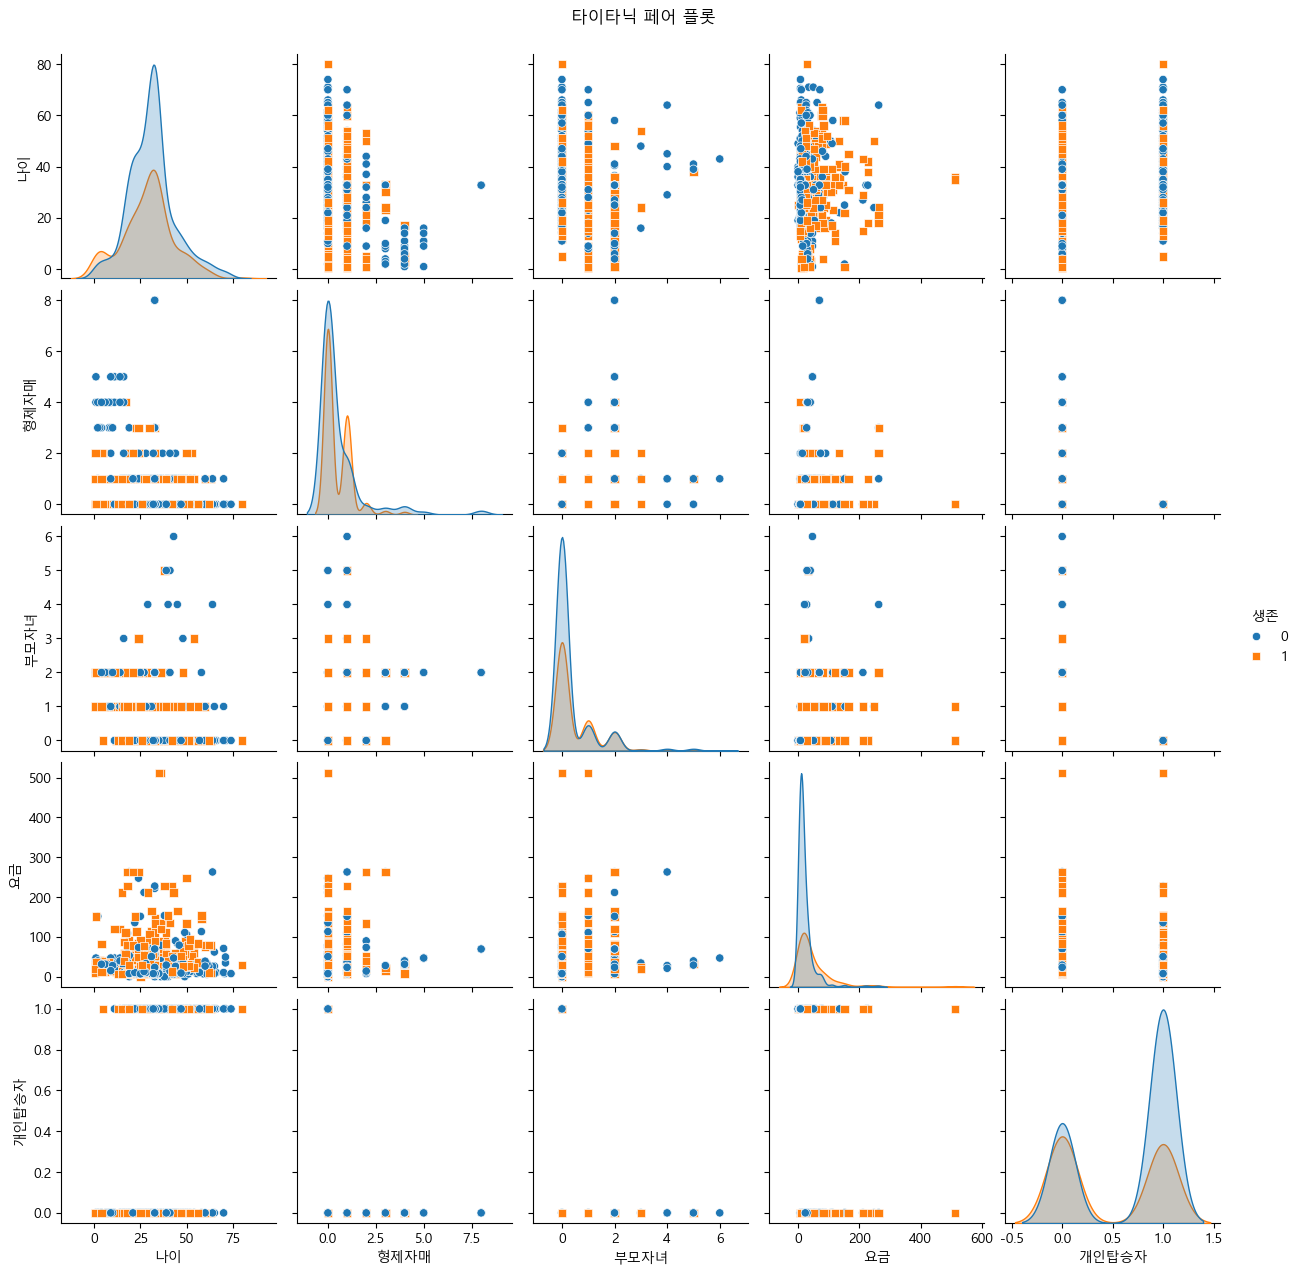

In [58]:
sns.pairplot(titanic_drop, hue='생존', markers=['o', 's'])
plt.suptitle('타이타닉 페어 플롯', y=1.02)
plt.show()

In [65]:
titanic_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생존      891 non-null    int64  
 1   나이      891 non-null    float64
 2   형제자매    891 non-null    int64  
 3   부모자녀    891 non-null    int64  
 4   요금      891 non-null    float64
 5   탑승지코드   891 non-null    object 
 6   객실등급    891 non-null    object 
 7   성인여부    891 non-null    object 
 8   개인탑승자   891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


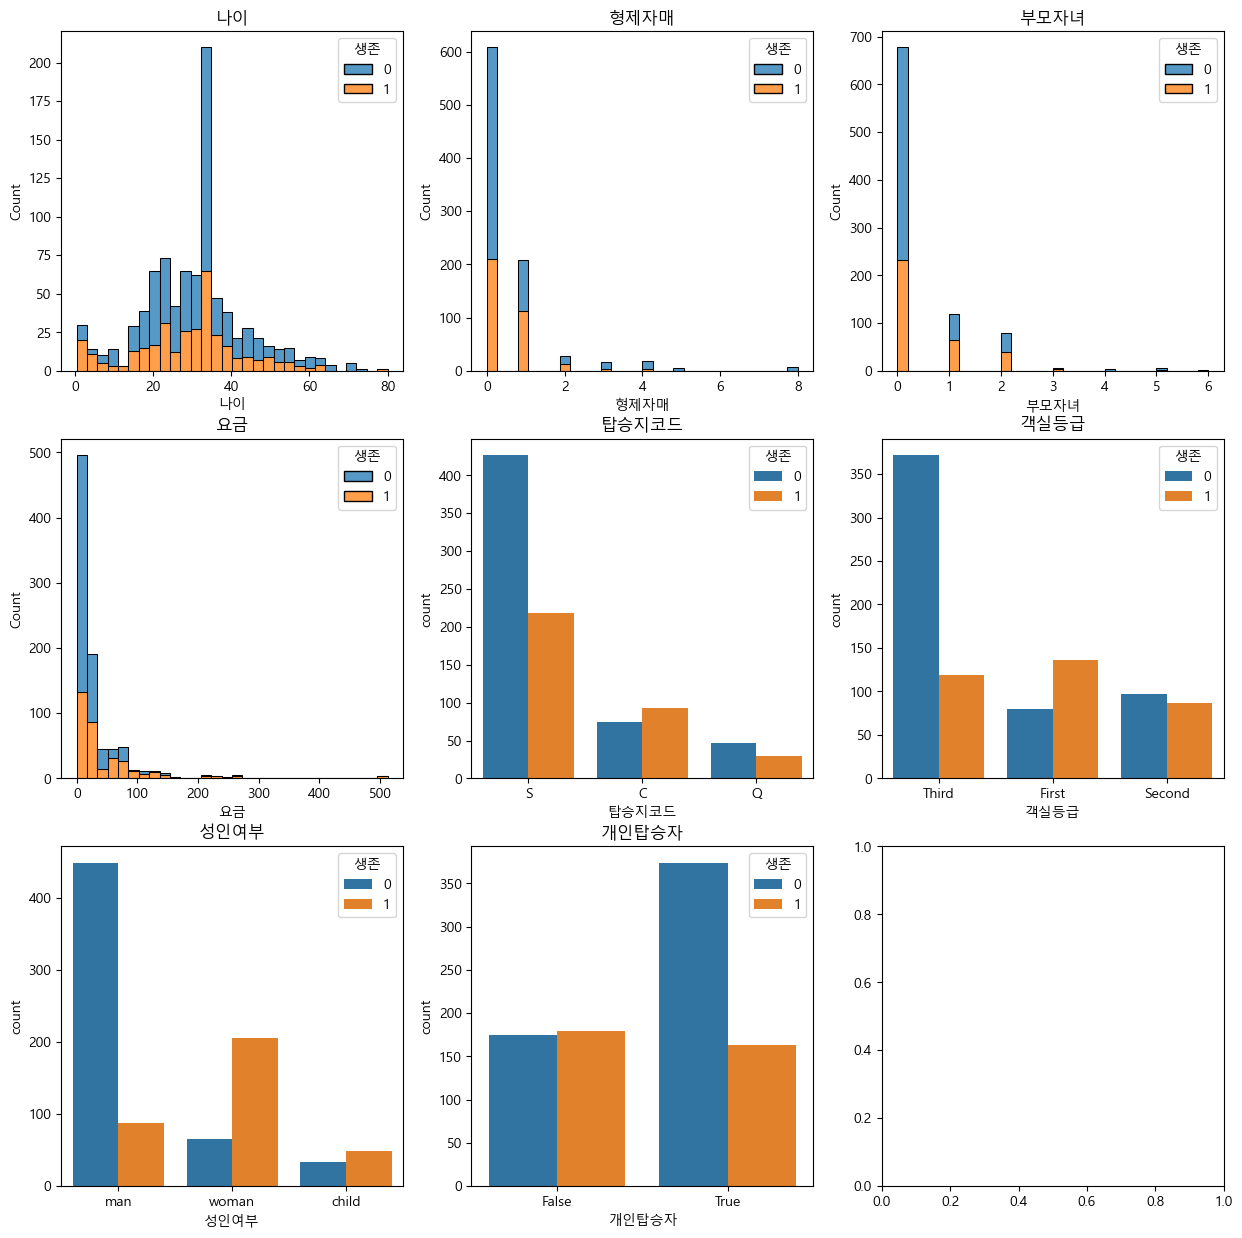

In [69]:
# 컬럼별 생존자 수 막대그래프 히스토그램
cols = [col for col in titanic_drop.columns if col != '생존']
n = len(cols)

ncols = 3
nrows = -(-n // ncols)  # 올림 나눗셈
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    if titanic_drop[col].dtype == 'object' or titanic_drop[col].dtype == 'bool':
        sns.countplot(data=titanic_drop, x=col, hue='생존', ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_ylabel('count')
    else:
        sns.histplot(data=titanic_drop, x=col, hue='생존', multiple='stack', bins=30, ax=axes[i])
        axes[i].set_title(f'{col}')

### 변수 인코딩

In [13]:
print(titanic_drop.info())
display(titanic_drop.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생존      891 non-null    int64  
 1   나이      891 non-null    float64
 2   형제자매    891 non-null    int64  
 3   부모자녀    891 non-null    int64  
 4   요금      891 non-null    float64
 5   탑승지코드   891 non-null    object 
 6   객실등급    891 non-null    object 
 7   성인여부    891 non-null    object 
 8   개인탑승자   891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB
None


,생존,나이,형제자매,부모자녀,요금,탑승지코드,객실등급,성인여부,개인탑승자
0,0,22.0,1,0,7.2500,S,Third,man,False
1,1,38.0,1,0,71.2833,C,First,woman,False
2,1,26.0,0,0,7.9250,S,Third,woman,True
3,1,35.0,1,0,53.1000,S,First,woman,False
4,0,35.0,0,0,8.0500,S,Third,man,True


In [14]:
binary_columns = ['개인탑승자']

In [15]:
cate_columns = ['탑승지코드', '객실등급', '성인여부']

In [16]:
def dummy_encoding(df, col_list):
    cate_df = titanic_drop[col_list]

    df_enc = pd.get_dummies(cate_df)

    return df_enc

In [17]:
cate_df = dummy_encoding(titanic_drop, cate_columns)

In [18]:
cate_df

,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman
0,False,False,True,False,False,True,False,True,False
1,True,False,False,True,False,False,False,False,True
2,False,False,True,False,False,True,False,False,True
3,False,False,True,True,False,False,False,False,True
4,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,True,False,True,False,False,True,False
887,False,False,True,True,False,False,False,False,True
888,False,False,True,False,False,True,False,False,True
889,True,False,False,True,False,False,False,True,False


In [19]:
train_df = pd.concat([cate_df, titanic_drop[['개인탑승자', '나이', '형제자매', '부모자녀', '요금']]], axis=1)
test_df = titanic_drop['생존']

In [20]:
train_df.head()

,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman,개인탑승자,나이,형제자매,부모자녀,요금
0,False,False,True,False,False,True,False,True,False,False,22.0,1,0,7.2500
1,True,False,False,True,False,False,False,False,True,False,38.0,1,0,71.2833
2,False,False,True,False,False,True,False,False,True,True,26.0,0,0,7.9250
3,False,False,True,True,False,False,False,False,True,False,35.0,1,0,53.1000
4,False,False,True,False,False,True,False,True,False,True,35.0,0,0,8.0500


<Axes: >

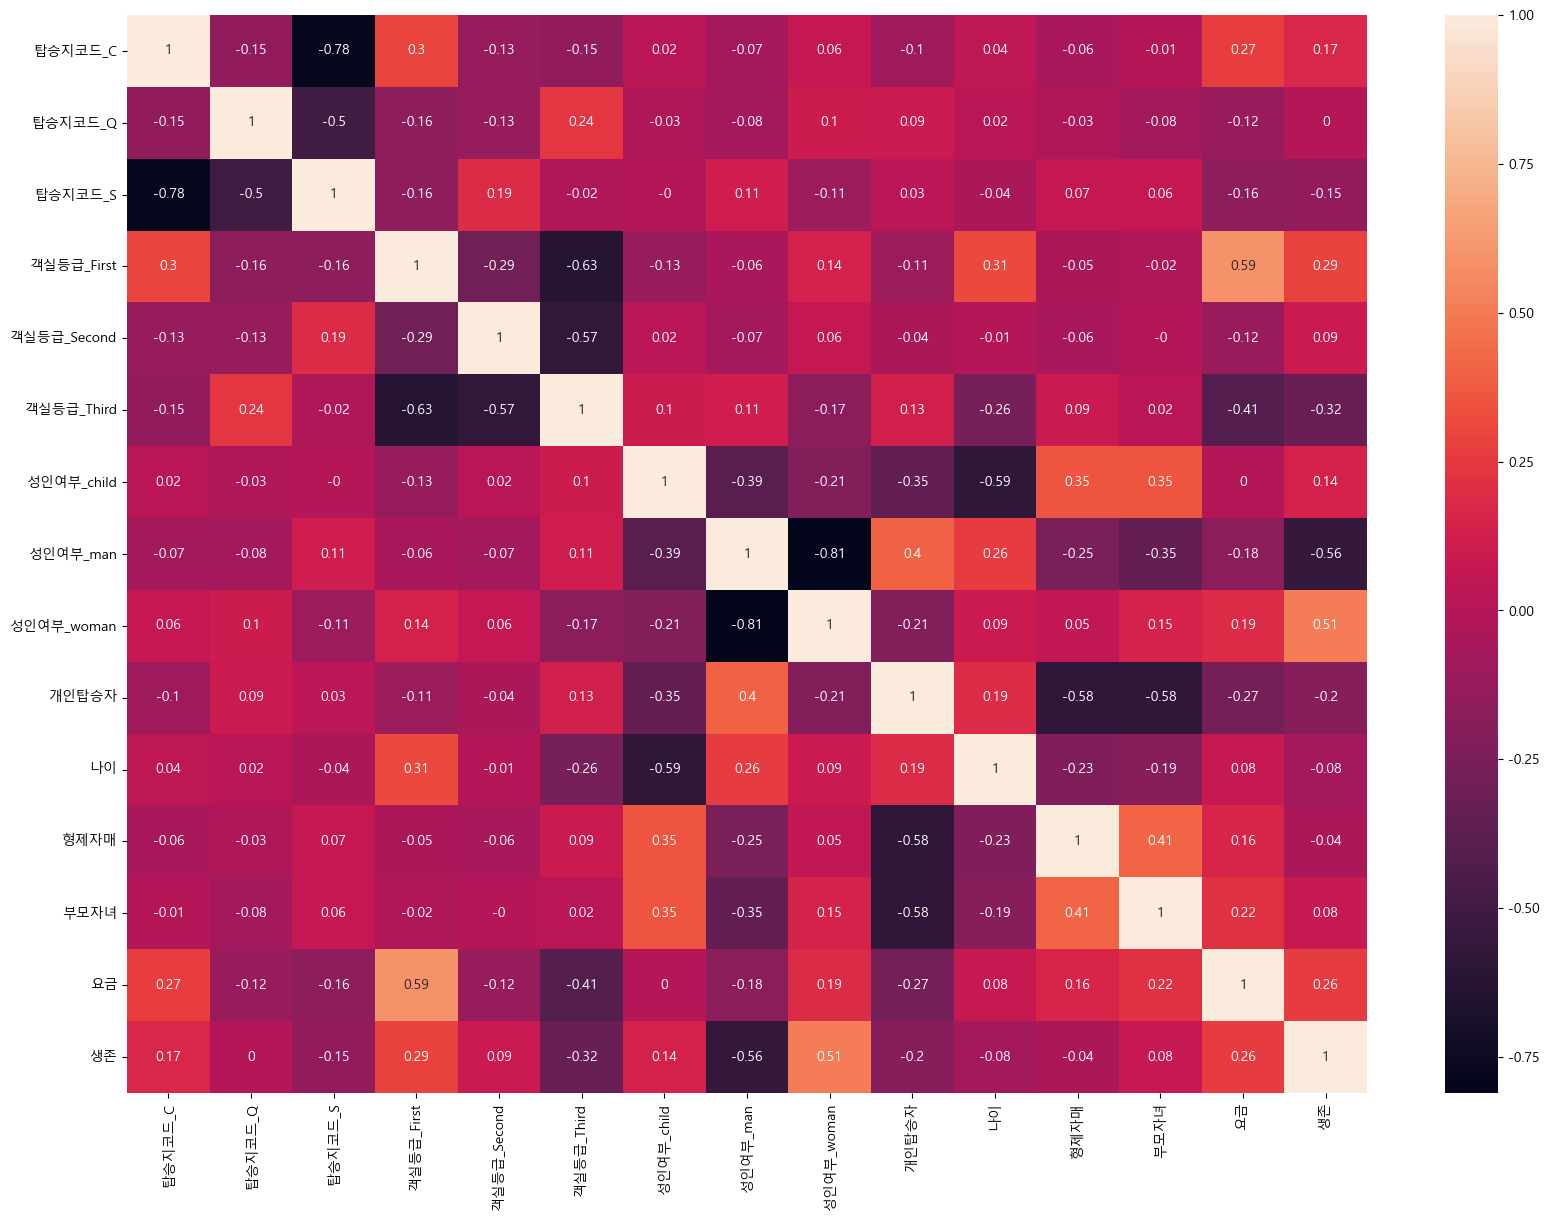

In [21]:
corr_df = train_df.copy()
corr_df['생존'] = test_df

plt.figure(figsize=(20,14))
sns.heatmap(corr_df.corr().round(2), annot = True)

### Prediction

In [88]:
test_df = pd.DataFrame(test_df)

In [89]:
test_df

,생존
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


#### KNN

In [127]:
test = titanic_drop['생존']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

✅ 정확도: 0.8436
✅ 정밀도: 0.8194
✅ 재현율: 0.7973
✅ F1 스코어: 0.8082
✅ ROC-AUC: 0.8764

✅ 분류 리포트:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



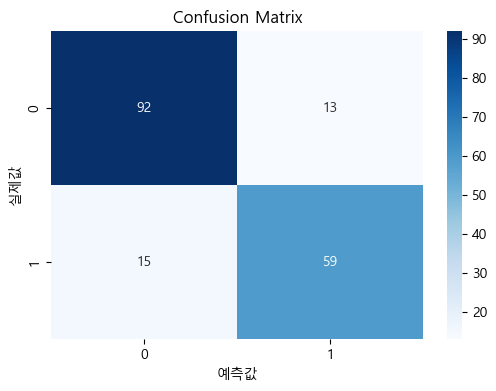

In [128]:
# 훈련, 검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(train_df, test, test_size=0.2, random_state=42)

# 수치형 변수 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  # k=5는 예시
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # ROC-AUC 계산용

print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()

#### 로지스틱

✅ 정확도: 0.8156
✅ 정밀도: 0.8060
✅ 재현율: 0.7297
✅ F1 스코어: 0.7660
✅ ROC-AUC: 0.8763

✅ 분류 리포트:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



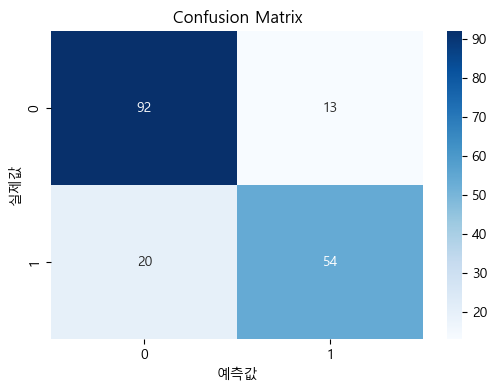

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 훈련/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(train_df, test, test_size=0.2, random_state=42)

# 2. 수치형 변수 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 로지스틱 회귀 모델 훈련
logreg = LogisticRegression(max_iter=1000)  # max_iter는 경고 방지용
logreg.fit(X_train_scaled, y_train)

# 4. 예측
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # ROC-AUC 계산용

# 5. 평가 지표 출력
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()


In [121]:
def logistic_tuning(train, test, params):

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    model = LogisticRegression(random_state = 42, max_iter=500)
    grid = GridSearchCV(model, params, scoring = 'accuracy', cv = 5)
    grid.fit(train, test)

    print('best params:', grid.best_params_)
    print('best score:', grid.best_score_)

    return grid.best_estimator_

In [115]:
test_df.shape

(891, 1)

In [122]:
%%time
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1]},
]
best_model = logistic_tuning(train_df, titanic_drop['생존'], params = param_grid)

best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
best score: 0.8204130311970372
CPU times: total: 1.95 s
Wall time: 1.35 s


✅ 정확도: 0.7598
✅ 정밀도: 0.7067
✅ 재현율: 0.7162
✅ F1 스코어: 0.7114
✅ ROC-AUC: 0.7624

✅ 분류 리포트:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



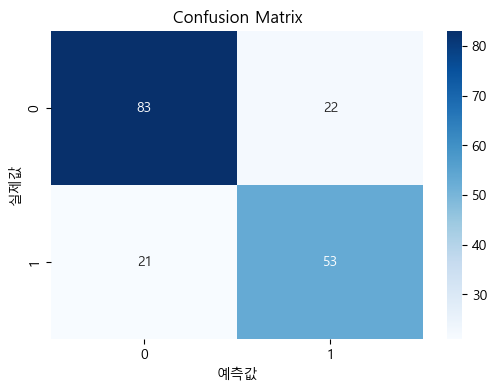

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 훈련/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(train_df, test, test_size=0.2, random_state=42)

# 2. 수치형 변수 스케일링 (의사결정나무는 스케일링 불필요하지만, 기존 코드 구조 유지)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 3. 의사결정나무 모델 훈련
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 4. 예측
y_pred = tree.predict(X_test)
y_proba = tree.predict_proba(X_test)[:, 1]  # ROC-AUC 계산용

# 5. 평가 지표 출력
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()


In [22]:
# 데이터를 3:7로 나누어봅시다.
from sklearn.model_selection import train_test_split

# y_titanic_df = df_train['Survived']
# X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(train_df, titanic_drop['생존'], test_size = 0.2, 
                                                    stratify=titanic_drop['생존'], random_state = 11)

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 각 모델에 대한 Classifier 클래스 생성
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)  # k=5는 예시
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11, max_iter=1000)

# KNN 학습/예측평가
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)
print('KNeighborsClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

# DecisionTreeClassfier 학습/예측평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

KNeighborsClassifier 정확도 : 0.8324
DecisionTreeClassifier 정확도 : 0.7933
RandomForestClassifier 정확도 : 0.8380
LogisticRegression 정확도 : 0.8380


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

최적 하이퍼파라미터: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
최고 정확도: 0.8244853737811486


✅ 정확도: 0.8380
✅ 정밀도: 0.7778
✅ 재현율: 0.8116
✅ F1 스코어: 0.7943
✅ ROC-AUC: 0.8964

✅ 분류 리포트:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       110
           1       0.78      0.81      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



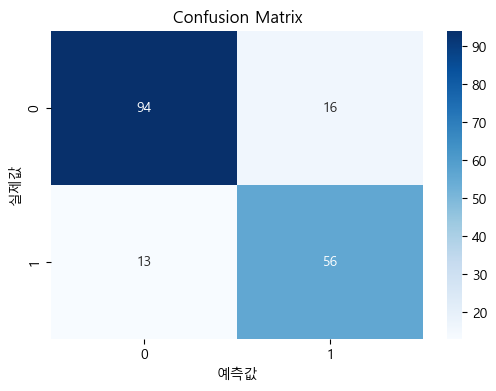

In [26]:
y_pred = rf_clf.predict(X_test)
y_proba = rf_clf.predict_proba(X_test)[:, 1]  # ROC-AUC 계산용

# 5. 평가 지표 출력
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()

✅ 정확도: 0.8268
✅ 정밀도: 0.7639
✅ 재현율: 0.7971
✅ F1 스코어: 0.7801
✅ ROC-AUC: 0.9072

✅ 분류 리포트:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.76      0.80      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



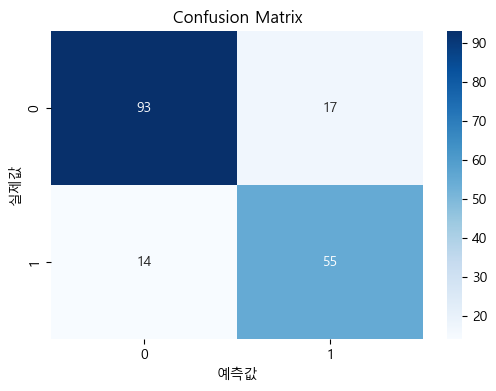

In [27]:
y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1]  # ROC-AUC 계산용

# 5. 평가 지표 출력
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()

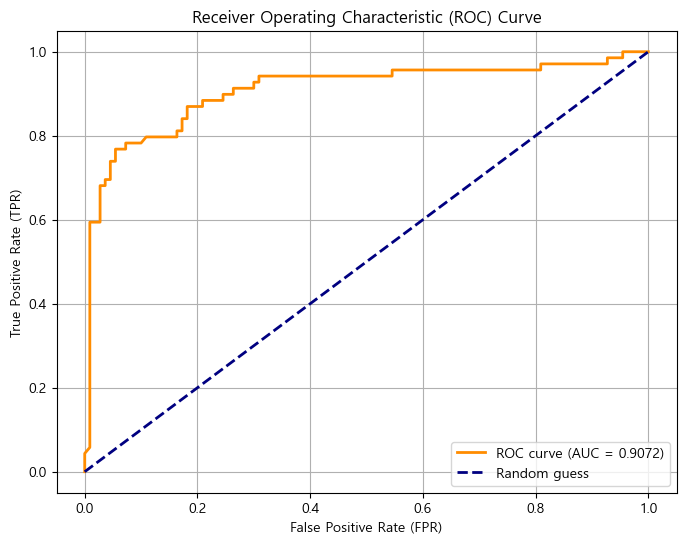

In [28]:
# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC 점수
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

✅ 정확도: 0.8380
✅ 정밀도: 0.7941
✅ 재현율: 0.7826
✅ F1 스코어: 0.7883
✅ ROC-AUC: 0.8911

✅ 분류 리포트:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



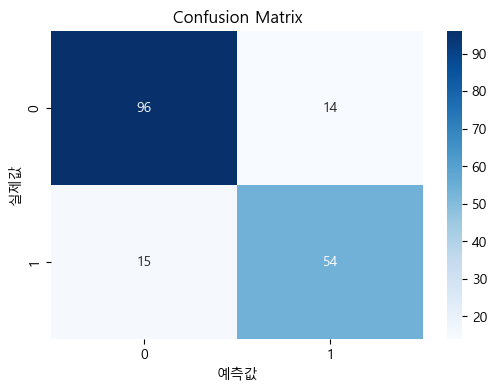

In [188]:
y_pred = lr_clf.predict(X_test)
y_proba = lr_clf.predict_proba(X_test)[:, 1]  # ROC-AUC 계산용

# 5. 평가 지표 출력
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()

In [200]:
grid_search.fit(train_df, titanic_drop['생존'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [202]:
import pandas as pd

def make_test():
    made_test = pd.DataFrame([{
        '탑승지코드_C': False,
        '탑승지코드_Q': False,
        '탑승지코드_S': False,
        '객실등급_First': False,
        '객실등급_Second': False,
        '객실등급_Third': False,
        '성인여부_child': False,
        '성인여부_man': False,
        '성인여부_woman': False,
        '개인탑승자': True,
        '나이': 0,
        '형제자매': 0,
        '부모자녀': 0,
        '요금': 0.0
    }])

    # 나이 입력
    try:
        age = int(input("나이 입력: "))
        made_test.at[0, '나이'] = age
    except:
        print("나이는 정수로 입력해야 합니다. 기본값 0 유지")
        age = 0

    # 성인여부 결정
    if age <= 18:
        # 무조건 child
        made_test.at[0, '성인여부_man'] = False
        made_test.at[0, '성인여부_woman'] = False
        made_test.at[0, '성인여부_child'] = True
    else:
        # 19세 이상은 man 또는 woman 입력 받기
        adult_status = input("성인여부 (man, woman) 입력: ").strip().lower()
        if adult_status in ['man', 'woman']:
            made_test.at[0, '성인여부_man'] = (adult_status == 'man')
            made_test.at[0, '성인여부_woman'] = (adult_status == 'woman')
            made_test.at[0, '성인여부_child'] = False
        else:
            print("성인여부는 man 또는 woman이어야 합니다. 기본값 유지")

    # 탑승지코드 입력받기
    boarding_code = input("탑승지코드 (S, C, Q) 입력: ").strip().upper()
    if boarding_code in ['C', 'S', 'Q']:
        for code in ['C', 'S', 'Q']:
            made_test.at[0, f'탑승지코드_{code}'] = (boarding_code == code)
    else:
        print("탑승지코드는 S, C, Q 중 하나여야 합니다. 기본값 유지")

    # 객실등급 입력받기
    room_grade = input("객실등급 (First, Second, Third) 입력: ").strip().capitalize()
    if room_grade in ['First', 'Second', 'Third']:
        for grade in ['First', 'Second', 'Third']:
            made_test.at[0, f'객실등급_{grade}'] = (room_grade == grade)
    else:
        print("객실등급은 First, Second, Third 중 하나여야 합니다. 기본값 유지")

    # 나머지 입력
    try:
        siblings = int(input("형제자매 수 입력: "))
        made_test.at[0, '형제자매'] = siblings
    except:
        print("형제자매 수는 정수로 입력해야 합니다. 기본값 유지")

    try:
        parents = int(input("부모자녀 수 입력: "))
        made_test.at[0, '부모자녀'] = parents
    except:
        print("부모자녀 수는 정수로 입력해야 합니다. 기본값 유지")

    try:
        fare = float(input("요금 입력: "))
        made_test.at[0, '요금'] = fare
    except:
        print("요금은 숫자로 입력해야 합니다. 기본값 유지")

    display(made_test)
    return made_test

# 테스트
df_test = make_test()
df_test



,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman,개인탑승자,나이,형제자매,부모자녀,요금
0,False,False,True,True,False,False,True,False,False,True,6,2,3,14.0


,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman,개인탑승자,나이,형제자매,부모자녀,요금
0,False,False,True,True,False,False,True,False,False,True,6,2,3,14.0


In [172]:
df_test

,탑승지코드_C,탑승지코드_S,탑승지코드_Q,객실등급_First,객실등급_Second,객실등급_Third,성인여부_man,성인여부_woman,성인여부_child,개인탑승자,나이,형제자매,부모자녀,요금
0,False,True,False,True,False,False,False,False,True,True,15,3,2,40.0


In [178]:
train_df

,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman,개인탑승자,나이,형제자매,부모자녀,요금
0,False,False,True,False,False,True,False,True,False,False,22.000000,1,0,7.2500
1,True,False,False,True,False,False,False,False,True,False,38.000000,1,0,71.2833
2,False,False,True,False,False,True,False,False,True,True,26.000000,0,0,7.9250
3,False,False,True,True,False,False,False,False,True,False,35.000000,1,0,53.1000
4,False,False,True,False,False,True,False,True,False,True,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,True,False,True,False,False,True,False,True,27.000000,0,0,13.0000
887,False,False,True,True,False,False,False,False,True,True,19.000000,0,0,30.0000
888,False,False,True,False,False,True,False,False,True,False,32.767829,1,2,23.4500
889,True,False,False,True,False,False,False,True,False,True,26.000000,0,0,30.0000


In [191]:
y_pred = loaded_model.predict(df_test)
y_pred

array([1])

In [193]:
print(y_pred[0])

1


In [169]:
X_test

,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman,개인탑승자,나이,형제자매,부모자녀,요금
212,False,False,True,False,False,True,False,True,False,True,22.000000,0,0,7.2500
456,False,False,True,True,False,False,False,True,False,True,65.000000,0,0,26.5500
557,True,False,False,True,False,False,False,True,False,True,32.767829,0,0,227.5250
763,False,False,True,True,False,False,False,False,True,False,36.000000,1,2,120.0000
682,False,False,True,False,False,True,False,True,False,True,20.000000,0,0,9.2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,True,False,False,True,True,False,False,False,2.000000,4,2,31.2750
4,False,False,True,False,False,True,False,True,False,True,35.000000,0,0,8.0500
352,True,False,False,False,False,True,True,False,False,False,15.000000,1,1,7.2292
499,False,False,True,False,False,True,False,True,False,True,24.000000,0,0,7.7958


In [ ]:
# 교차검증을 통해 결정트리 모델을 평가해볼까요?
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5) :
    # 폴드 세트가 5개인 KFold 객체 생성. 폴드 수만큼 예측결과 저장 위한 리스트 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(train_df)) :
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = train_df.values[train_index], train_df.values[test_index] # values를 통해 df를 ndarray로 변환
        y_train, y_test = titanic_drop['생존'].values[train_index], titanic_drop['생존'].values[test_index]
        
        # Classifier 학습/예측/평가
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count+1, accuracy))
        
    # 5개의 fold에서 평균 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

#exec_fold 호출
exec_kfold(lr_clf, folds = 5)

교차 검증 1 정확도 : 0.8156
교차 검증 2 정확도 : 0.8090
교차 검증 3 정확도 : 0.8034
교차 검증 4 정확도 : 0.7809
교차 검증 5 정확도 : 0.8876
평균 정확도: 0.8193


In [158]:
train_df.describe()

,나이,형제자매,부모자녀,요금
count,891.000000,891.000000,891.000000,891.000000
mean,30.308727,0.523008,0.381594,32.204208
std,13.059601,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,32.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [145]:
# 데이터를 3:7로 나누어봅시다.
from sklearn.model_selection import train_test_split

# y_titanic_df = df_train['Survived']
# X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['탑승지코드_S', '탑승지코드_Q', '탑승지코드_C']), titanic_drop['생존'], 
                                                    test_size = 0.3, stratify=titanic_drop['생존'], random_state = 11)

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 각 모델에 대한 Classifier 클래스 생성
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)  # k=5는 예시\
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11, max_iter=1000)

# KNN 학습/예측평가
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)
print('KNeighborsClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

# DecisionTreeClassfier 학습/예측평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

KNeighborsClassifier 정확도 : 0.8060
DecisionTreeClassifier 정확도 : 0.7761
RandomForestClassifier 정확도 : 0.8209
LogisticRegression 정확도 : 0.8358


In [147]:
titanic_drop.head()

,생존,나이,형제자매,부모자녀,요금,탑승지코드,객실등급,성인여부,개인탑승자
0,0,22.0,1,0,7.2500,S,Third,man,False
1,1,38.0,1,0,71.2833,C,First,woman,False
2,1,26.0,0,0,7.9250,S,Third,woman,True
3,1,35.0,1,0,53.1000,S,First,woman,False
4,0,35.0,0,0,8.0500,S,Third,man,True


In [149]:
features = pd.concat([train_df, titanic_drop[['생존']]], axis=1)
features.head()

,탑승지코드_C,탑승지코드_Q,탑승지코드_S,객실등급_First,객실등급_Second,객실등급_Third,성인여부_child,성인여부_man,성인여부_woman,개인탑승자,나이,형제자매,부모자녀,요금,생존
0,False,False,True,False,False,True,False,True,False,False,22.0,1,0,7.2500,0
1,True,False,False,True,False,False,False,False,True,False,38.0,1,0,71.2833,1
2,False,False,True,False,False,True,False,False,True,True,26.0,0,0,7.9250,1
3,False,False,True,True,False,False,False,False,True,False,35.0,1,0,53.1000,1
4,False,False,True,False,False,True,False,True,False,True,35.0,0,0,8.0500,0


In [153]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_components = pd.DataFrame(pca.components_, columns=train_df.columns, index=['PC1', 'PC2', 'PC3'])
print(pca_components.T.sort_values(by='PC1', ascending=False))

                  PC1       PC2       PC3
개인탑승자        0.452026  0.073543 -0.059332
성인여부_man     0.429354  0.022623  0.042636
나이           0.190506  0.364509  0.104998
객실등급_Third   0.136737 -0.399243 -0.395672
탑승지코드_S      0.088160 -0.252023  0.577959
탑승지코드_Q      0.047547 -0.045149 -0.421462
객실등급_Second -0.011918 -0.016378  0.415835
탑승지코드_C     -0.134789  0.320116 -0.356984
객실등급_First  -0.147443  0.478842  0.066437
성인여부_woman  -0.268042  0.169688 -0.003051
요금          -0.280115  0.340159  0.046533
성인여부_child  -0.298603 -0.306678 -0.066953
형제자매        -0.343758 -0.207537  0.017684
부모자녀        -0.385501 -0.150357  0.060604


In [155]:
X_pca

array([[ 0.43562324, -1.42615331,  0.07068298],
       [-2.3130526 ,  3.08472813, -1.09090902],
       [ 0.26579629, -0.64860842, -0.12756188],
       ...,
       [-1.91568331, -1.06514704,  0.22917758],
       [ 0.44034354,  2.48283627, -1.26965466],
       [ 1.78618013, -0.40110471, -2.78007642]], shape=(891, 3))

In [157]:
# 데이터를 3:7로 나누어봅시다.
from sklearn.model_selection import train_test_split

# y_titanic_df = df_train['Survived']
# X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_pca, titanic_drop['생존'], test_size = 0.3, 
                                                    stratify=titanic_drop['생존'], random_state = 11)

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 각 모델에 대한 Classifier 클래스 생성
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)  # k=5는 예시
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11, max_iter=1000)

# KNN 학습/예측평가
# knn_clf.fit(X_train_scaled, y_train)
# knn_pred = knn_clf.predict(X_test_scaled)
# print('KNeighborsClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

# DecisionTreeClassfier 학습/예측평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7425
RandomForestClassifier 정확도 : 0.7687
LogisticRegression 정확도 : 0.6940
